In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




In [9]:
data=pd.read_csv('data/preprocessed.csv')
data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56.0,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0.0,Active,746,1933.05,4,Rural,1.0,119933.46,54607.18
1,C-33999,America Calderone,M,32.0,4952.91,Low,Working,Laborers,Semi-Urban,46837.47,...,780.40,0.0,Unpossessed,608,4952.91,2,Rural,1.0,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65.0,988.19,High,Pensioner,Laborers,Semi-Urban,45593.04,...,833.15,0.0,Unpossessed,546,988.19,2,Urban,0.0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65.0,2222.86,High,Pensioner,Laborers,Rural,80057.92,...,832.70,1.0,Unpossessed,890,2223.61,2,Semi-Urban,1.0,121441.51,56040.54
4,C-23459,Afton Venema,F,31.0,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1.0,Active,715,2614.77,4,Semi-Urban,1.0,208567.91,74008.28


In [28]:
# Define target variable
y = data['Loan Sanction Amount (USD)']

# Define features (drop the target and irrelevant columns)
X = data.drop(columns=['Loan Sanction Amount (USD)', 'Customer ID','Name','Type of Employment','Property ID'], axis=1)

# If necessary, encode categorical features
X = pd.get_dummies(X)


In [53]:
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the features (independent variables)
X_scaled = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [55]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)



Numerical Columns: ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property ID', 'Property Age', 'Property Type', 'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)']
Categorical Columns: ['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']


In [56]:
# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X, y)


LinearRegression()

In [57]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error



# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

mse=mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

rmse_scores = cross_val_score(linear_model, X, y, cv=3, scoring=rmse_scorer)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()
mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard deviation:", std_rmse)
print("mae", mae)




RMSE scores: [28018.56660073 27523.35097042 27111.7887029 ]
Mean RMSE: 27551.235424682003
Standard deviation: 370.7152510955844
mae 145235.0934445873


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_

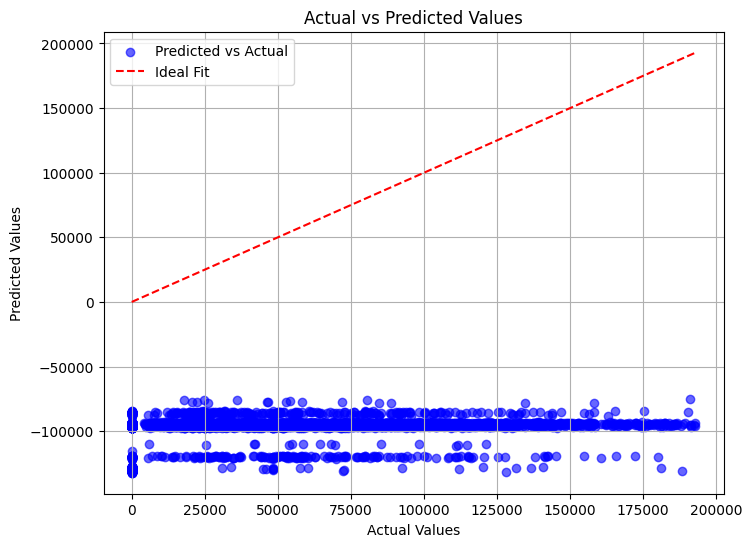

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train_scaled)

In [ ]:
# Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))

# Compute MSE in the original scale
mse_original = mean_squared_error(y_test, y_pred_original)

# Compute RMSE in the original scale
rmse_original = np.sqrt(mse_original)
print("RMSE in Original Scale:", rmse_original)

r2 = r2_score(y_test, y_pred_original)
print(f"R² score: {r2}")

In [ ]:
errors = abs(y_test - y_pred_original)
plt.scatter(y_test, y_pred_original, c=errors, cmap='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Prediction vs Actual (Linear Regression)")
plt.show()

In [ ]:
# Visualisation of Mean and Standard Deviations of MSE over 5 folds , for different fractions of training data/validation set
fractions = np.linspace(0.1, 1.0, 10)  
mean_values = []
std_values = []

# Calculate MSE for each train size
for train_size in fractions:
    # Fractioning the training data to the train_size
    fraction_X_train = X_train_scaled[:int(train_size * len(X_train))]
    fraction_y_train = y_train_scaled[:int(train_size * len(y_train))]

    # Performing cross-validation on the current fraction
    mse_values = cross_val_score(
        linear_model, fraction_X_train, fraction_y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    # Calculating mean MSE for the training set and validation set
    mean_values.append(-mse_values.mean())  
    std_values.append(np.std(mse_values)) 


plt.plot(fractions, mean_values, label="Average MSE over 5 folds", color='blue')
plt.plot(fractions, std_values, label="Standard Deviation of MSE over 5 folds", color='red')
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='blue', alpha=0.1)
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='red', alpha=0.1)

print(f"Average MSE over 5 folds for entire training set: {mean_values[-1]:.2f}")
print(f"Standard Deviation of MSE over 5 folds for entire training set: {std_values[-1]:.2f}")

plt.xlabel("Fraction of Training Data")
plt.ylabel("Values")
plt.title("Mean and Stadard Deviation of MSE per fold of 5-fold cross validation, applied on different fractions of training data")
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=5)  # Choose the number of components to retain
X_pca = pca.fit_transform(X_scaled)

# Step 3: Perform linear regression on the transformed data
regressor = LinearRegression()
regressor.fit(X_pca, y)

# Step 4: Make predictions
y_pred = regressor.predict(X_pca)

# Step 5: Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')